In [1]:
pip install yfinance


  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23909 sha256=4d04f1102a52db12f4f2a3d0ab791bb1a83c50e5cbb9629d366b63aabfe71b13
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8368 sha256=96754997937b6d3ecae95259c9f74a400d49760b719e6c65375750de7fffd023
  Stored in directory: /root/.cache/pip/wheels/ae/25/47/4d68431a7ec1b6c4b5233365934b74c1d4e665bf5f968d363a
Successfully built yfinance multitasking
Note: you may need to restart the kernel to use updated packages.


In [2]:
import datetime

In [4]:
import yfinance as yf
import pandas as pd

# Fetch Price

In [5]:
DOGE_price = yf.download(tickers='DOGE-USD', period = '4y', interval = '1d')['Adj Close']
DOGE_price.head()

[*********************100%***********************]  1 of 1 completed


Date
2017-07-13    0.001823
2017-07-14    0.001681
2017-07-15    0.001484
2017-07-16    0.001307
2017-07-17    0.001520
Name: Adj Close, dtype: float64

In [6]:
DOGE_price.tail()

Date
2021-07-08    0.207597
2021-07-09    0.219864
2021-07-10    0.213920
2021-07-11    0.215856
2021-07-13    0.200213
Name: Adj Close, dtype: float64

# Plots

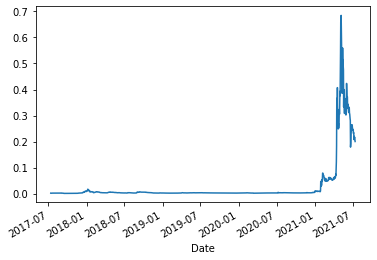

In [7]:
import matplotlib.pyplot as plt
DOGE_price.plot()
plt.show()

In [8]:
DOGE_daily_returns = DOGE_price.pct_change().dropna(axis=0)
type(DOGE_price)

pandas.core.series.Series

In [9]:
DOGE_daily_cum_returns = (DOGE_daily_returns +1).cumprod()-1
DOGE_daily_cum_returns

Date
2017-07-14     -0.077894
2017-07-15     -0.185957
2017-07-16     -0.283050
2017-07-17     -0.166210
2017-07-18      0.022490
                 ...    
2021-07-08    112.876577
2021-07-09    119.605591
2021-07-10    116.345032
2021-07-11    117.407020
2021-07-13    108.826363
Name: Adj Close, Length: 1456, dtype: float64

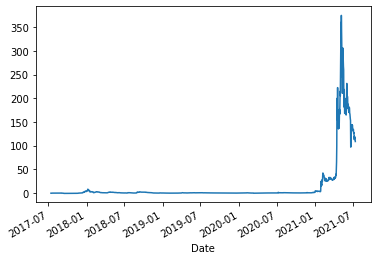

In [10]:
DOGE_daily_cum_returns.plot()
plt.show()

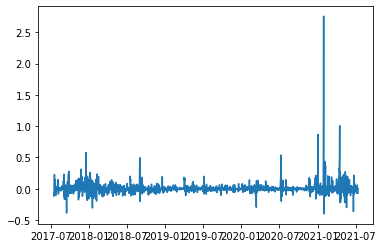

In [11]:
fig, axs = plt.subplots(1,1,gridspec_kw={'hspace':0.2,'wspace':0.1})
axs.plot(DOGE_daily_returns)

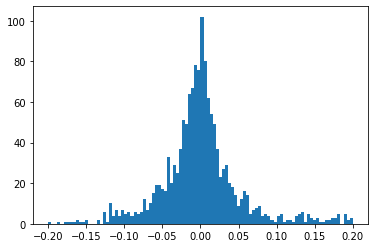

In [12]:
fig, axs = plt.subplots(1,1,gridspec_kw={'hspace':0.2,'wspace':0.1})
axs.hist(DOGE_daily_returns,bins=100,range=(-0.2,0.2))
plt.show()

In [13]:
DOGE_price1 = yf.download(tickers='DOGE-USD', period = '4y', interval = '1d')
DOGE_price1.head()
type(DOGE_price1)

[*********************100%***********************]  1 of 1 completed


pandas.core.frame.DataFrame

In [14]:
DOGE_daily_returns1 = DOGE_price1.pct_change().dropna(axis=0)
type(DOGE_daily_returns1)

pandas.core.frame.DataFrame

In [15]:
DOGE_daily_returns = DOGE_daily_returns1['Adj Close']
type(DOGE_daily_returns)

pandas.core.series.Series

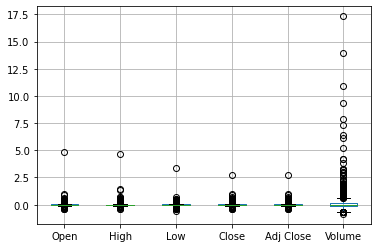

In [16]:
#fig, axs = plt.subplots(1,1,gridspec_kw={'hspace':0.2,'wspace':0.1})
DOGE_daily_returns1.boxplot()#column='Adj Close')
plt.show()

# Prediction

In [17]:
pip install Prophet

     |████████████████████████████████| 65 kB 312 kB/s eta 0:00:01
     |████████████████████████████████| 49 kB 928 kB/s eta 0:00:01
  Created wheel for Prophet: filename=prophet-1.0.1-py3-none-any.whl size=6644099 sha256=d9775aac2a3ac5cdf3f6657dd1b6c5e0effa71c17505183c8bcfb801f38b9281
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built Prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [18]:
from fbprophet import Prophet
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

In [19]:
import datetime as dt


In [20]:
DOGE_df = yf.download(tickers='DOGE-USD', period = '6y', interval = '1d')

[*********************100%***********************]  1 of 1 completed


In [21]:
modelfb = Prophet()
DOGE_df = DOGE_df.reset_index()
DOGE_df[['ds','y']] = DOGE_df[['Date','Adj Close']]
modelfb.fit(DOGE_df)


In [22]:
future = modelfb.make_future_dataframe(periods=180)

In [23]:
forecast = modelfb.predict(future)

In [24]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

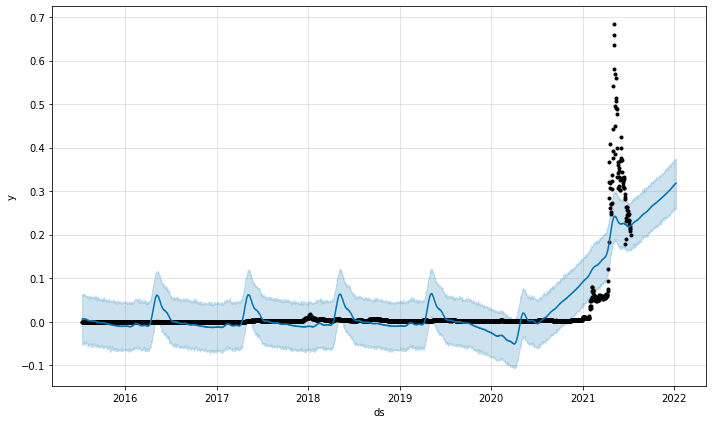

In [25]:
modelfb.plot(forecast)
plt.show()

In [26]:
import plotly.express as px
fig = px.line(forecast, x='ds', y="yhat")
fig.show()